In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/#Github_File#/KerasFuzzy-master/KerasFuzzy')

In [ ]:
import pandas as pd
import numpy as np
import keras
from FuzzyLayer import FuzzyLayer
from DefuzzyLayer import DefuzzyLayer
from keras.models import Sequential

In [ ]:
import pandas as pd
import numpy as np
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import keras
from sklearn.model_selection import train_test_split

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Bifta Apu/class1.csv",header = None)
data2 = pd.read_csv("/content/drive/MyDrive/Bifta Apu/class3.csv",header = None)

In [ ]:
Data1 = data1.iloc[:,0]
Data2 = data2.iloc[:,0]

In [ ]:
label1 = data1.iloc[:,1]
label2 = data2.iloc[:,1]

In [ ]:
x_train = np.concatenate((Data1, Data2))
y_train = np.concatenate((label1, label2))

In [ ]:
model = Sequential()
model.add(FuzzyLayer(20, input_dim=2))
#model.add(Dropout(0.5))
#model.add(DefuzzyLayer(1))

model.add(Flatten())
#model.add(Dense(5, activation='relu'))
#model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.add(DefuzzyLayer(4))
#model.add(Dense(4, activation='sigmoid'))

model.compile(loss='logcosh',
              optimizer='rmsprop',
              metrics=['mae', 'acc'])

model.fit(x_train, y_train, epochs=3)

'''
#for Fuzzy

model.compile(loss='logcosh',
              optimizer='rmsprop',
              metrics=['mae'])

model.fit(x_train, y_train,
          epochs=100,
          verbose=1,
          batch_size=100)
'''

Epoch 1/3
46/46 [==============================] - 15s 3ms/step - loss: 1.0917 - mae: 1.6971 - acc: 0.0000e+00
Epoch 2/3
46/46 [==============================] - 0s 3ms/step - loss: 1.0407 - mae: 1.6369 - acc: 0.0000e+00
Epoch 3/3
46/46 [==============================] - 0s 3ms/step - loss: 1.0232 - mae: 1.6125 - acc: 0.0000e+00


"\n#for Fuzzy\n\nmodel.compile(loss='logcosh',\n              optimizer='rmsprop',\n              metrics=['mae'])\n\nmodel.fit(x_train, y_train,\n          epochs=100,\n          verbose=1,\n          batch_size=100)\n"

In [ ]:
print(model.predict( np.array([[5, 5]])))
print(model.predict( np.array([[5, 15]])))
print(model.predict( np.array([[15, 5]])))
print(model.predict( np.array([[15, 15]])))

[[0.11792154 0.17198291 0.10844427 0.09987596]]
[[0.11792152 0.17198293 0.10844427 0.09987596]]
[[0.11792152 0.17198293 0.10844427 0.09987596]]
[[0.11792152 0.17198293 0.10844427 0.09987596]]


# #***neural_fuzzy_logic_Iris_Dataset***

In [ ]:
#%%
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from FuzzyLayer import FuzzyLayer
from tensorflow.python.client import device_lib
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#print(device_lib.list_local_devices())
#%%

In [ ]:
input_img = Input(shape=(784,))
model = Dense(256)(input_img)
model = Dense(2)(model)
f_layer = FuzzyLayer(100)
model = f_layer(model)
model = Dense(10, activation='softmax')(model)
mnist_classifier = Model(input_img, model)

#%%
mnist_classifier.compile(
        optimizer='adagrad',
        loss='categorical_crossentropy',
        metrics=['mae','acc'])

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
mnist_classifier.fit(x_train, y_train,
                epochs=10,
                batch_size=48,
                shuffle=True,
                validation_data=(x_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2599 - mae: 0.1778 - acc: 0.1017 - val_loss: 2.1059 - val_mae: 0.1735 - val_acc: 0.1519
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0902 - mae: 0.1730 - acc: 0.1626 - val_loss: 2.0576 - val_mae: 0.1720 - val_acc: 0.2014
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0480 - mae: 0.1717 - acc: 0.2054 - val_loss: 2.0293 - val_mae: 0.1711 - val_acc: 0.2434
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0232 - mae: 0.1708 - acc: 0.2373 - val_loss: 2.0072 - val_mae: 0.1703 - val_acc: 0.2545
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9980 - mae: 0.1700 - acc: 0.2557 - val_loss: 1.9881 - val_mae: 0.1696 - val_acc: 0.2741
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9832 - mae: 0.1694 - acc: 0.2796 - val_loss: 1.9706 - val_mae: 0.1689 - val_acc: 0.2839
Epoc

In [ ]:
weights = f_layer.get_weights()

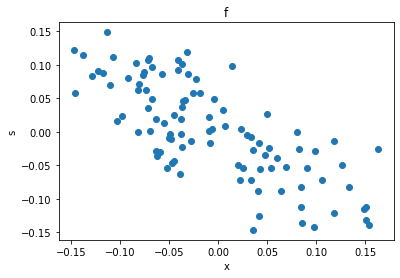

In [ ]:
plt.ion()
plt.show()
plt.clf()
plt.title('f')
plt.ylabel('s')
plt.xlabel('x')

tmpy = []
tmpx = []
for i in range(0, 100):
        tmpy.append(weights[0][0][i])
        tmpx.append(weights[0][1][i])

plt.scatter(tmpx, tmpy)   
plt.show()

#***Fuzzy_neural_network***

In [ ]:
import keras
from FuzzyLayer import FuzzyLayer
from DefuzzyLayer import DefuzzyLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import random as rnd
from matplotlib.patches import Ellipse

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_img = Input(shape=(784,))
model = Dense(256)(input_img)

model = Dense(2)(model)

f_layer = FuzzyLayer(100)

model = f_layer(model)
model = Dense(10, activation='softmax')(model)
mnist_classifier = Model(input_img, model)

In [ ]:
model = Sequential()
#f_layer = FuzzyLayer(K, initializer_centers=lambda x: np.transpose(np.array([x_train[i] for i in indices])), input_dim=4)
model.add(f_layer)
#model.add(Dense(3, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
model.fit(x_train, 
          y_train,
          epochs=5,
          verbose=1,
          batch_size=1)

In [ ]:
f_layer = FuzzyLayer(20, input_dim=2)
model = Sequential()
model.add(f_layer)
#model.add(Dense(20, activation='sigmoid'))
model.add(DefuzzyLayer(1))